In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import norm, probplot

In [ ]:
# Đọc dữ liệu từ tập tin babies.txt
column_names = ["bwt", "gestation", "parity", "age", "height", "weight", "smoke"]
data = pd.read_table("buoi1/babies.txt", delim_whitespace=True, names=column_names)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\1202699383.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("babies.txt", delim_whitespace=True, names=column_names)


In [3]:
# Tách dữ liệu thành hai tập con: mẹ có hút thuốc (smoke=1) và mẹ không hút thuốc (smoke=0)
data_smoke = data[data["smoke"] == 1]
data_no_smoke = data[data["smoke"] == 0]

In [4]:
# 1. Mô tả thống kê cơ bản cho mỗi tập dữ liệu
def describe_data(dataset):
    desc = {
        "Count": len(dataset),
        "Min": dataset.min(),
        "Max": dataset.max(),
        "Mean": dataset.mean(),
        "SD": dataset.std(),
        "Variance": dataset.var(),
        "Median": dataset.median(),
        "Quantile 0%": dataset.quantile(0),
        "Quantile 25%": dataset.quantile(0.25),
        "Quantile 50%": dataset.quantile(0.5),
        "Quantile 75%": dataset.quantile(0.75),
        "IQR": dataset.quantile(0.75) - dataset.quantile(0.25),
        "Skewness": skew(dataset),
        "Kurtosis": kurtosis(dataset)
    }
    return pd.DataFrame(desc, index=["bwt"]).T

In [5]:
# Tính các đại lượng thống kê cho trường hợp có hút thuốc và không hút thuốc
desc_smoke = describe_data(data_smoke["bwt"])
desc_no_smoke = describe_data(data_no_smoke["bwt"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2075005169.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "Skewness": skew(dataset),
C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2075005169.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "Kurtosis": kurtosis(dataset)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2075005169.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "Skewness": skew(dataset),
C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2075005169.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "Kurtosis": kurtosis(dataset)


In [6]:
# Hiển thị bảng thống kê
print("Mô tả thống kê cho trường hợp mẹ có hút thuốc:")
display(desc_smoke)

print("Mô tả thống kê cho trường hợp mẹ không hút thuốc:")
display(desc_no_smoke)

Mô tả thống kê cho trường hợp mẹ có hút thuốc:


,bwt
Count,0.0
Min,NaN
Max,NaN
Mean,NaN
SD,NaN
Variance,NaN
Median,NaN
Quantile 0%,NaN
Quantile 25%,NaN
Quantile 50%,NaN


Mô tả thống kê cho trường hợp mẹ không hút thuốc:


,bwt
Count,0.0
Min,NaN
Max,NaN
Mean,NaN
SD,NaN
Variance,NaN
Median,NaN
Quantile 0%,NaN
Quantile 25%,NaN
Quantile 50%,NaN


# 2. Biểu diễn dữ liệu bằng đồ thị

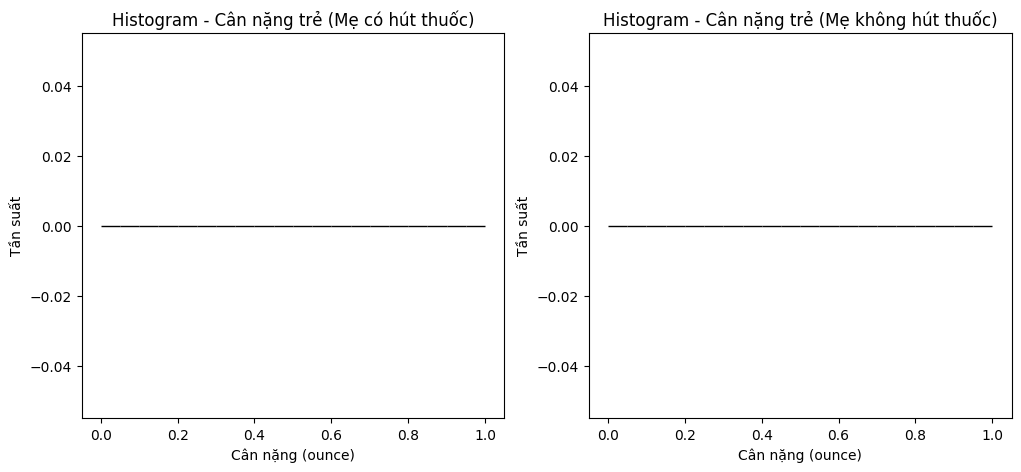

In [7]:
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data_smoke["bwt"], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram - Cân nặng trẻ (Mẹ có hút thuốc)")
plt.xlabel("Cân nặng (ounce)")
plt.ylabel("Tần suất")

plt.subplot(1, 2, 2)
plt.hist(data_no_smoke["bwt"], bins=20, color='salmon', edgecolor='black')
plt.title("Histogram - Cân nặng trẻ (Mẹ không hút thuốc)")
plt.xlabel("Cân nặng (ounce)")
plt.ylabel("Tần suất")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2609250783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoke", y="bwt", data=data, palette=["salmon", "skyblue"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_24248\2609250783.py:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="smoke", y="bwt", data=data, palette=["salmon", "skyblue"])


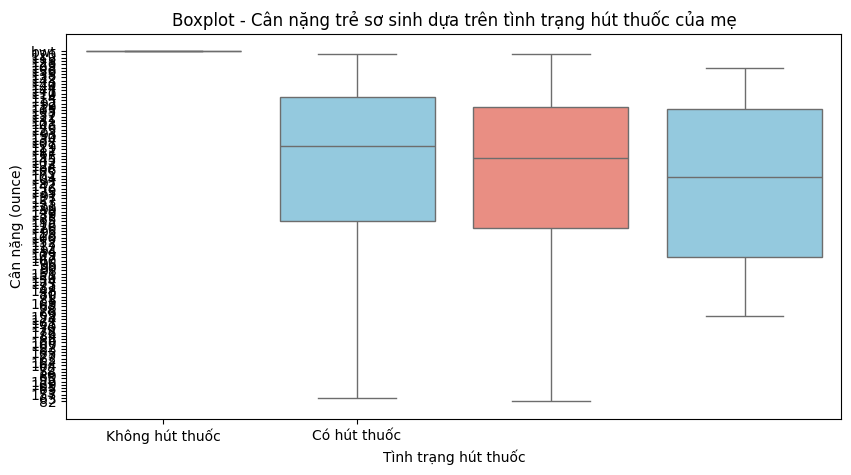

In [8]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoke", y="bwt", data=data, palette=["salmon", "skyblue"])
plt.title("Boxplot - Cân nặng trẻ sơ sinh dựa trên tình trạng hút thuốc của mẹ")
plt.xticks([0, 1], ["Không hút thuốc", "Có hút thuốc"])
plt.xlabel("Tình trạng hút thuốc")
plt.ylabel("Cân nặng (ounce)")
plt.show()

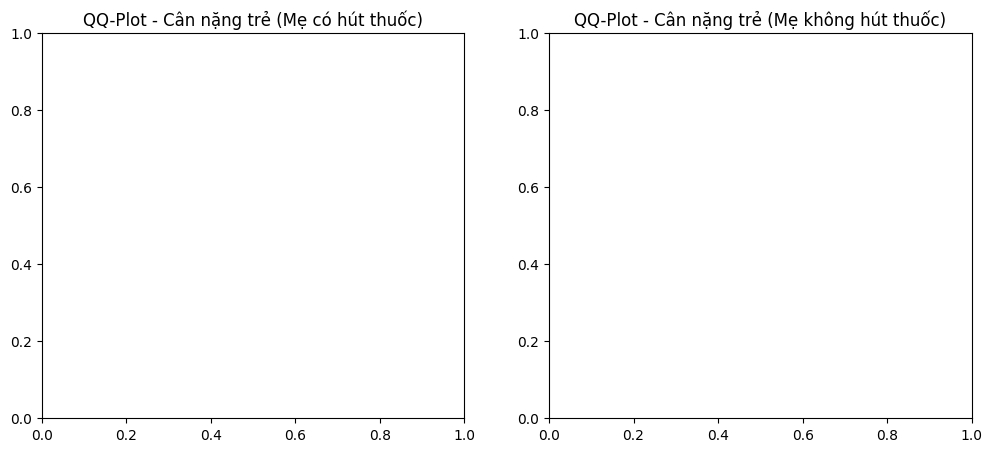

In [9]:
# QQ-plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
probplot(data_smoke["bwt"], dist="norm", plot=plt)
plt.title("QQ-Plot - Cân nặng trẻ (Mẹ có hút thuốc)")

plt.subplot(1, 2, 2)
probplot(data_no_smoke["bwt"], dist="norm", plot=plt)
plt.title("QQ-Plot - Cân nặng trẻ (Mẹ không hút thuốc)")
plt.show()